In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

we = 0.25
k = ((we)**2)/4
g = (1-k)/(1+k)
Nt = 100
Nsweeps = 1000
delta = 1.5
u = np.zeros((Nt+1,Nsweeps))
AccProbs =  u.copy()
Accs =  u.copy()
f = np.zeros(Nsweeps)

def SampleFromUniform(delta):
    return (delta*(2*(np.random.random())-1))

def Observable(phi,i,t):
    return phi[i]*phi[i+t]

def AutoCoVariance(x,h,mu):
    N = len(x)
    return (1/(N-h))*(np.dot(x[0:N-h]-mu,x[h:N]-mu))

for trial in range(Nsweeps-1):
    u[:,trial+1] = u[:,trial].copy()
    for i in range(Nt):
        #j = np.random.randint(1,Nt-1)
        #Sequential Is the Way to go
        j = i
        d = SampleFromUniform(delta)
        unew = u[j,trial]+d
        ds = d*(d+2*u[j,trial]-g*(u[j-1,trial]+u[j+1,trial]))
        rr = np.random.random()
        AccProbs[j,trial] = min(1,np.exp(-ds))
        if rr<AccProbs[j,trial]:
            u[j,trial+1] = unew
            Accs[j,trial] = 1
        else:
            u[j,trial+1] = u[j,trial]
            Accs[j,trial] = 0
    f[trial+1] = Observable(u[:,trial],50,5)

            
         
print(np.mean(Accs))
print(np.mean(f))
print(np.sqrt(np.var(f)))
#N1 = len(f)
#cov = [AutoCoVariance(f,i,mu) for i in range(N1)]
#plt.plot(cov[0:100])
#plt.show()

0.602544554455
2.01216945922
2.73377129813


In [ ]:
"""(1) Randomly choose an integer j from 1 to Nt−1, where Nt is the number
of time slices, with equal probability.
(2) Propose a random shift uj → u˜j = uj + δ with δ chosen with uniform
probability density in the range −∆ ≤ δ ≤ ∆.
(3) Calculate the change δS in the action:
δS/~ = δ (δ + 2uj − g(uj−1 + uj+1)).
(4) Since R(˜uj ← uj) = R(uj ← u˜j), then accept the proposed value
u
new
j = ˜uj with probability min(1, e−δS/~
). If not accepted, then retain
the old value: u
new
j = uj.
(5) Repeat the above procedure Nt times to constitute one updating sweep.
"""

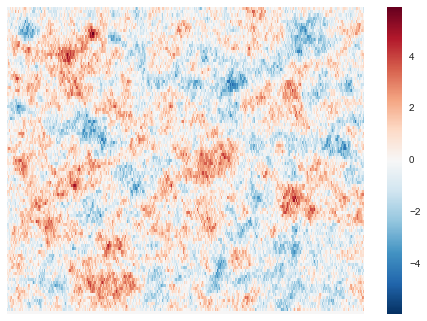

In [202]:
sns.heatmap(u,xticklabels=False, yticklabels=False)
plt.show()

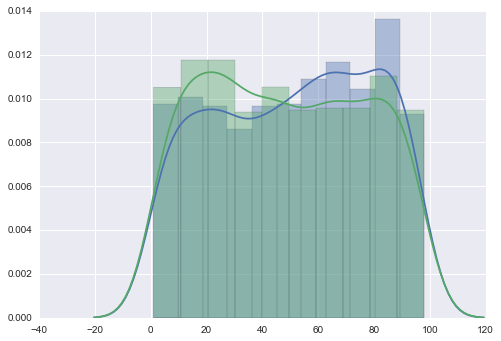

In [196]:
ss = [np.random.randint(1,Nt-1) for i in range(1000)]

sns.distplot(ss)
plt.show()

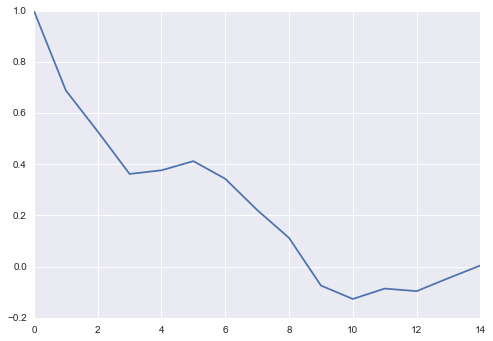

In [203]:
obs = np.zeros(40)
o2d = np.mean(np.multiply(u[49,200:],u[49,200:]))
od2 = np.mean(u[49,200:])**2
for tau in range(40):
    obs[tau] = (np.mean(np.multiply(u[49,200:],u[49+tau,200:])) -  od2)/(o2d-od2)
plt.plot(obs[0:15])
plt.show()

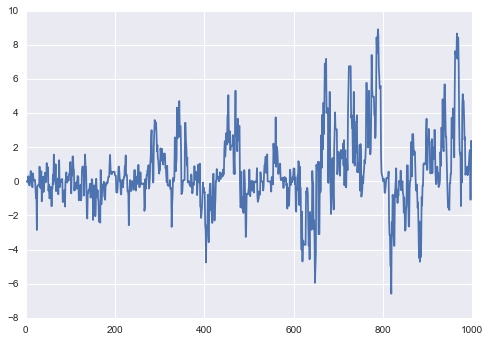

In [192]:
plt.plot(f)
plt.show()

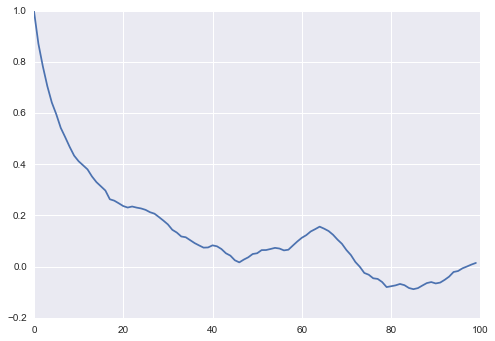

In [193]:
def AutoCoVariance(x,h,mu):
    N = len(x)
    return (1/(N-h))*(np.dot(x[0:N-h],x[h:N])-mu**2)

mu = np.mean(f[200:])
N1 = len(f[200:])
cov = np.array([AutoCoVariance(f[200:],i,mu) for i in range(N1)])
corr = (1/cov[0])*cov
plt.plot(corr[0:100])
plt.show()

-0.10874690010848097